# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple, non-parametric, and supervised machine learning algorithm used for **classification** and **regression** tasks. It works by finding the closest data points (neighbors) in the feature space and making predictions based on their characteristics.

## How KNN Works

1. **Input Data**:
   - Dataset with labeled instances (classification) or numeric outcomes (regression).
   - Instances are represented as feature vectors in an n-dimensional space.

2. **Distance Metric**:
   - Common distance metrics include:
     - **Euclidean Distance**: \( \sqrt{\sum (x_i - y_i)^2} \)
     - **Manhattan Distance**: \( \sum |x_i - y_i| \)
     - **Minkowski Distance**: Generalized version of the above.

3. **Selecting \( k \)**:
   - \( k \) is the number of nearest neighbors to consider.
   - Typically, \( k \) is an odd number to avoid ties in classification.

4. **Finding Nearest Neighbors**:
   - Calculate the distance between the query point and all other points in the dataset.
   - Identify the \( k \) closest points.

5. **Prediction**:
   - **Classification**: Assign the query point the class that is most common among its \( k \) neighbors (majority voting).
   - **Regression**: Predict the average (or weighted average) value of the \( k \) neighbors.

---

## Strengths
- **Simple to implement**: Relies on intuitive principles.
- **Non-parametric**: No assumptions about the data distribution.
- **Effective for small datasets**: Particularly when the data is clean and well-structured.

## Weaknesses
- **Computationally expensive**: Requires distance calculation for all data points.
- **Sensitive to irrelevant features**: Irrelevant features can mislead distance computations.
- **Curse of dimensionality**: As dimensions increase, distance measures become less meaningful.

---

## Applications
- Handwriting recognition (e.g., digit recognition).
- Image classification.
- Recommender systems.
- Fraud detection.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    r2_score,
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

## Load and Explore Dataset

Loading the Olivetti Faces dataset...
Number of samples: 400
Number of features (pixels): 4096
Number of classes: 40


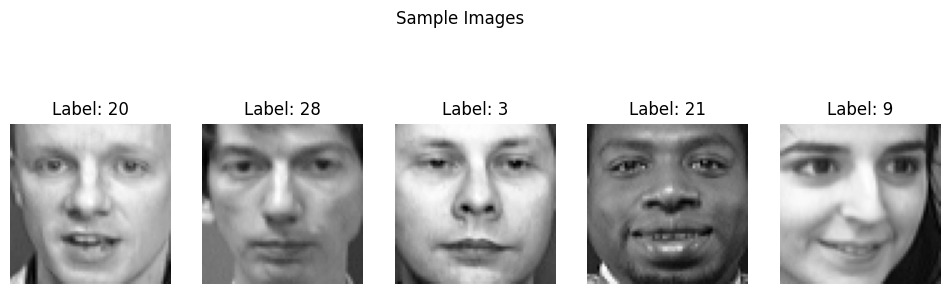

In [8]:
print("Loading the Olivetti Faces dataset...")
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

# Display dataset properties
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (pixels): {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# Visualize some sample images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Images")
plt.show()

## Split Data and Apply Alogirthm

In [9]:

# ## Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ## Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ## Apply K-Nearest Neighbors Algorithm
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
print(f"Training KNN with k={k}...")
knn.fit(X_train_scaled, y_train)


Training samples: 280, Testing samples: 120
Training KNN with k=5...


KNeighborsClassifier()

## Model Evaluation

Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       0.33      1.00      0.50         3
           3       0.43      0.60      0.50         5
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           7       0.50      0.25      0.33         4
           8       0.75      1.00      0.86         3
           9       1.00      0.25      0.40         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.75      0.75      0.75         4
          13       1.00      1.00      1.00         5
          14       0.75      0.60      0.67         5
          15       1.00      1.00      1.00         2
          16       1.00      0.67      0.80         3
          17       0.75      1.00 

c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NANAYAW\anaconda3\envs\ML-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

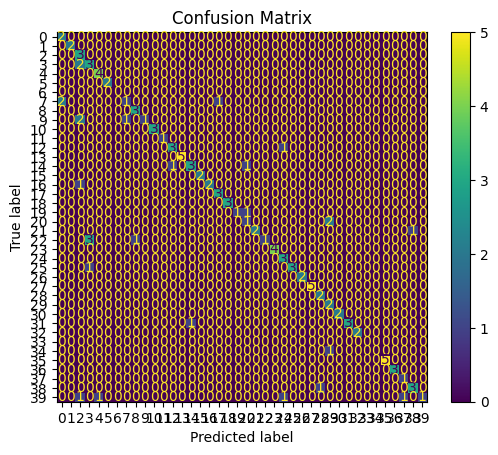

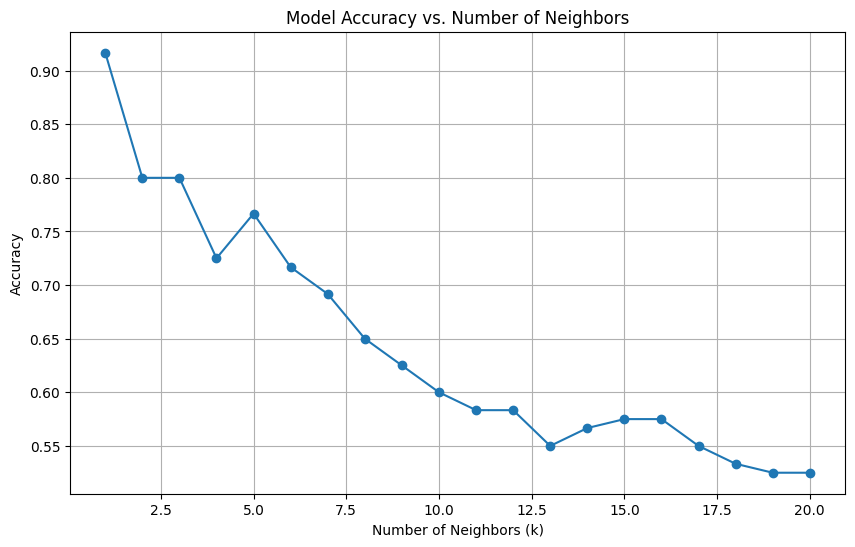

Performing KNN Regression...
KNN Regression Results:
Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Mean Squared Error: 63.5686
Mean Absolute Error: 6.2765
R² Score: 0.5056


In [10]:
print("Evaluating the model...")
y_pred = knn.predict(X_test_scaled)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix with proper labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y))
ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y)).plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# ## Analyze Model Accuracy vs. Number of Neighbors
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Model Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# ## KNN Regression Analysis
# Using regression to predict continuous labels (demonstrative)
print("Performing KNN Regression...")
knn_regressor = KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='auto')
knn_regressor.fit(X_train_scaled, y_train)

# Predict regression results
y_pred_regression = knn_regressor.predict(X_test_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_regression)
mae = mean_absolute_error(y_test, y_pred_regression)
r2 = r2_score(y_test, y_pred_regression)

print("KNN Regression Results:")
print("Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


## Comprehensive Visualizations for KNN Results

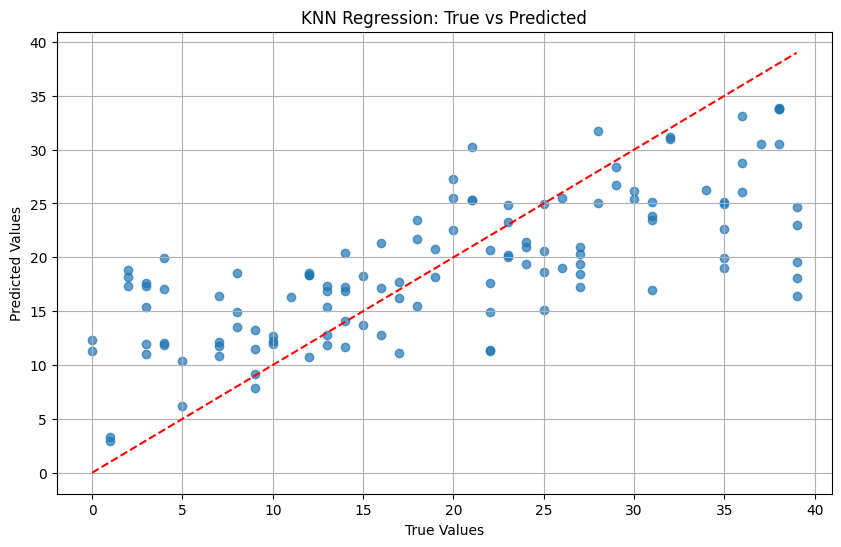

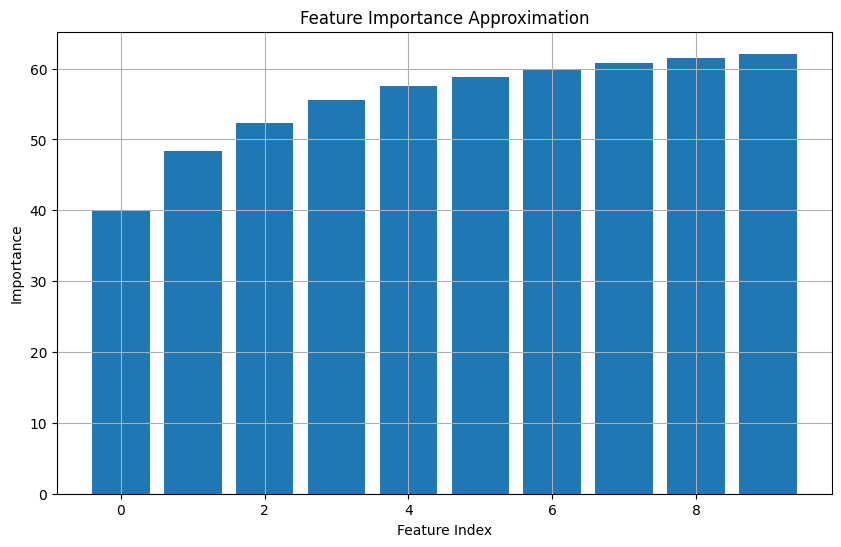

In [11]:
# Regression: True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_regression, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("KNN Regression: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

# Feature Importance (Approximation via scaling weights)
feature_importance = np.mean(np.abs(knn_regressor.kneighbors(X_test_scaled, return_distance=True)[0]), axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title("Feature Importance Approximation")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid()
plt.show()


### Summary

In [12]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Optimal number of neighbors: {best_k}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")


Optimal number of neighbors: 1
Best accuracy: 91.67%


### We find an accuracy of 91%  and optimal neighbour of 1.